# Magnitude
Show size comparisons. These can be relative (just being able to see larger/bigger) or absolute (need to see fine differences). Usually these show a 'counted' number (for example, barrels, dollars or people) rather than a calculated rate or per cent

In [177]:
import pandas as pd
import numpy as np
#ggplot equivalent: plotnine
from plotnine import *
#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *
import utils

## Ordered bar
Standard bar charts display the ranks of values much more easily when sorted into order

In [4]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


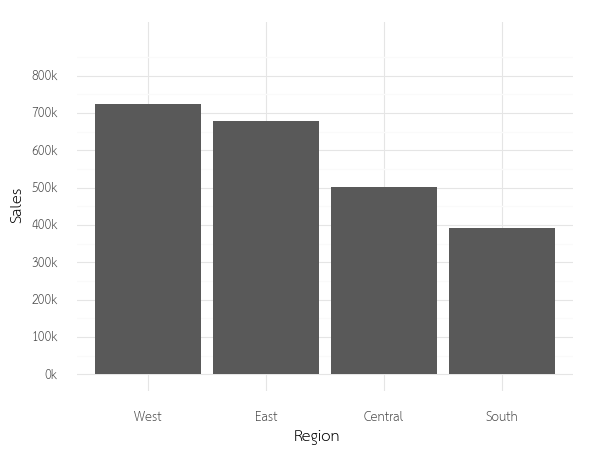

<ggplot: (-9223363305469172406)>

In [6]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col() + 
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Bar

See before. Good when the data are not time series and labels have long category names.



In [7]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


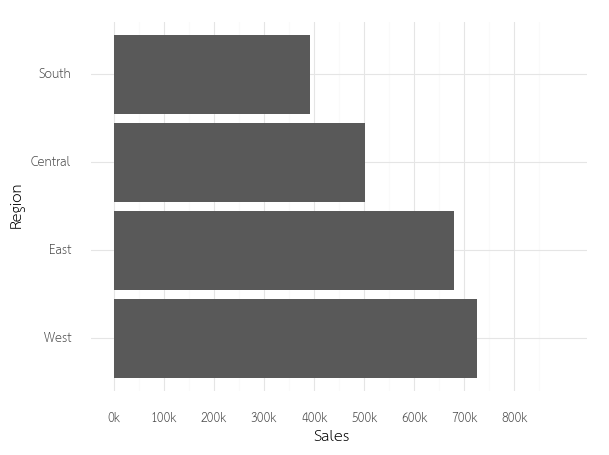

<ggplot: (-9223363305471033137)>

In [9]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col() + coord_flip() +
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Paired column

As per standard column but allows for multiple series. Can become tricky to read with more than 2 series

In [10]:
df = pd.read_csv('data/paired-column.csv')
df.head()

,Region,Year,Sales
0,West,2018,250128.37
1,West,2015,147883.03
2,East,2018,213082.90
3,East,2015,128680.46
4,Central,2018,147098.13


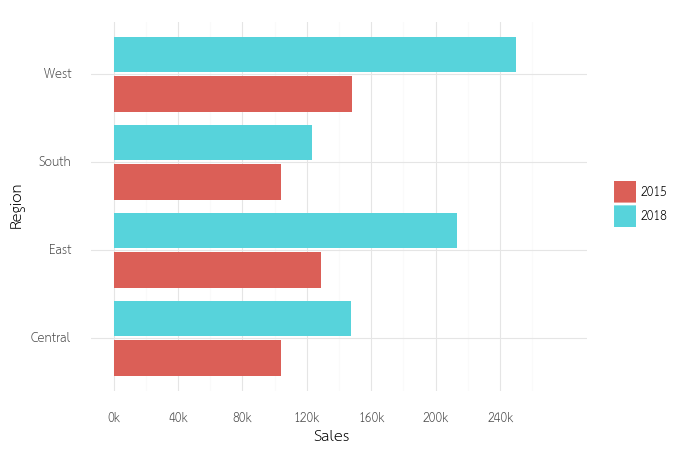

<ggplot: (8731385632015)>

In [20]:
g = (ggplot(df,aes(x='Region',y='Sales',fill='factor(Year)')) +
     geom_bar(position='dodge2',stat='identity') + coord_flip() +
     scale_y_continuous(limits=(0,280000),breaks=range(0,280000,40000),labels=utils.k_format()) +
     theme(legend_title=element_blank())
    )
g

## Marimekko
A good way of showing the size and proportion of data at the same time - as long as the data are not too complicated

In [178]:
df = pd.read_csv('data/marimekko.csv')
df_agg = df[['Region','Sales']].groupby('Region').sum().reset_index()
df =df.merge(df_agg,on='Region')
df['per'] = df['Sales_x']/df['Sales_y']
df.head()

,Region,Year,Sales_x,Sales_y,per
0,West,2018,250137.86,725385.27,0.344834
1,West,2017,187458.30,725385.27,0.258426
2,West,2016,139940.81,725385.27,0.192919
3,West,2015,147848.30,725385.27,0.203820
4,East,2018,213069.43,678781.24,0.313900


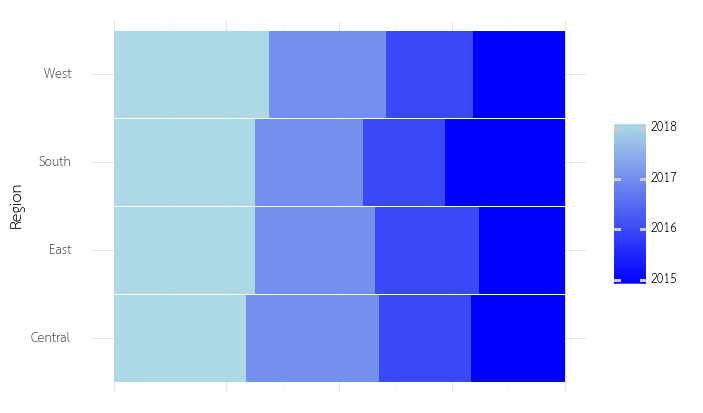

<ggplot: (-9223363305480201107)>

In [50]:
g = (ggplot(df,aes(x='Region',y='per',fill='Year')) +
     geom_col(width=0.99) + coord_flip() +
     scale_fill_gradient(low='blue',high='lightblue') +
     theme(legend_title=element_blank(),axis_text_x=element_blank()) +
     ylab('')
    )
g

## Proportional symbol
Use when there are big variations between values and/or seeing fine dierences between data is not so important

In [12]:
df = pd.read_csv('data/ordered-proportional-symbol.csv')
df.head()

,State,Burglary Rate,Murder Rate,Population Size
0,California,693.3,6.9,3420.53
1,Texas,961.6,6.2,2782.72
2,New York,353.3,4.5,2490.77
3,Florida,926.3,5.0,2415.39
4,Illinois,606.9,6.0,2026.50


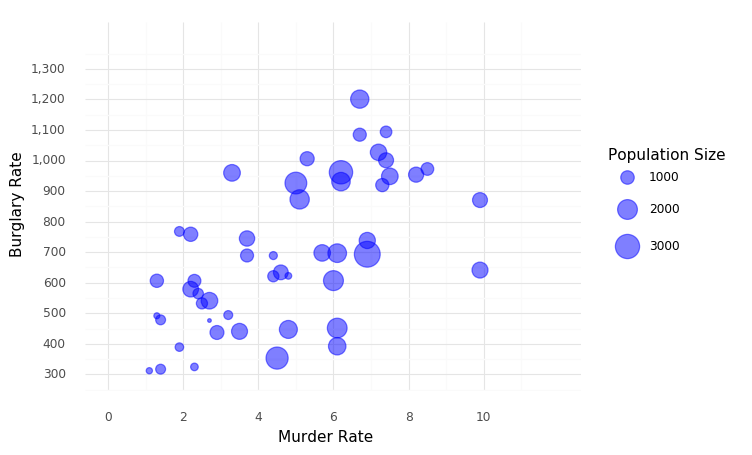

<ggplot: (8750229750469)>

In [22]:
g = (ggplot(df,aes(x='Murder Rate',y='Burglary Rate',size='Population Size')) +
     scale_size(range=(1,10)) + #scaling size
     geom_point(alpha=0.5,color='blue') + theme_minimal() +
     #x and y axis scales
     scale_y_continuous(limits=(300,1400), breaks=range(300,1400,100), 
                        labels=utils.prettynum_format()) +
     scale_x_continuous(limits=(0,12), breaks=range(0,12,2), 
                        labels=lambda x: [i if i%2==0 else '' for i in x]) 
    )
g

## Isotype (pictogram)
Excellent solution in some instances - use only with whole numbers (do not slice off an arm to represent a decimal). Not easily implementable now. Use Gridplot instead.

In [179]:
df = []
for i in range(10):
    for j in range(10):
        df.append({'x':i,'y':j})
df = pd.DataFrame(df)
df['filled'] = 0
df.iloc[:32,2] = 1
df.head()

,x,y,filled
0,0,0,1
1,0,1,1
2,0,2,1
3,0,3,1
4,0,4,1


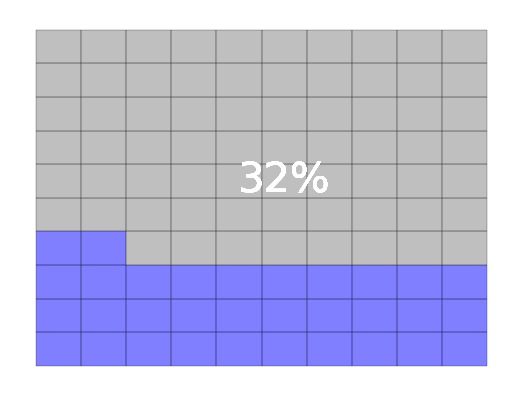

<ggplot: (8731383482274)>

In [180]:
g = (ggplot(df, aes(x='x',y='y',fill='factor(filled)')) +
     geom_tile(alpha=0.5,color='black') + guides(fill=False) +
     scale_fill_manual(['grey','blue']) + #manual fill
     theme_void() + coord_flip() +#remove grid 
     geom_text(x=5,y=5,label=f'{int(100*df.filled.mean())}%',size=30,color='white') +
     theme(axis_text=element_blank()) + xlab('') + ylab('') 
    )
g

## Lollipop
Lollipop charts draw more attention to the data value than standard bar/column and can also show rank effectively

In [32]:
df = pd.read_csv('data/ordered-bar.csv')
df = df.sort_values('Sales',ascending=False)
ordered_cats = df['Region']
df['Region'] = pd.Categorical(df['Region'], categories=ordered_cats, ordered=True)
df.head()

,Region,Sales
3,West,725457.82
2,East,678781.24
1,Central,501239.89
0,South,391721.90


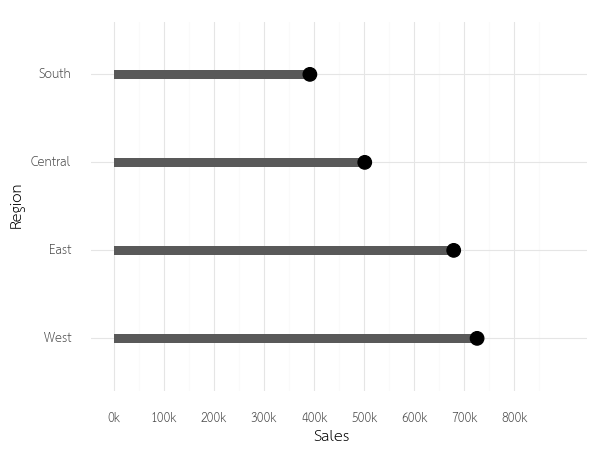

<ggplot: (-9223363286624914649)>

In [40]:
g = (ggplot(df,aes(x='Region',y='Sales')) +
     geom_col(width=0.1) + geom_point(size=5) + 
     coord_flip() +
     scale_y_continuous(limits=(0,900000),breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Radar

A space-efficient way of showing value pf multiple variables - but make sure they are organised in a way that makes sense to reader. There is no intuitive way to implement this on `plotnine` yet so we use a max-normalized line plot instead.

In [76]:
df = pd.read_csv('data/radar.csv')
df_m = df.melt('body')
df_m_agg = df_m.groupby(['variable']).max().reset_index()
df_m = df_m.merge(df_m_agg[['variable','value']], on=['variable'])
df_m['per_max'] = df_m['value_x'] / df_m['value_y']
df_m.head()

,body,variable,value_x,value_y,per_max
0,convertible,city-mpg,20.50,26.31,0.779171
1,hatchback,city-mpg,26.31,26.31,1.000000
2,sedan,city-mpg,15.32,26.31,0.582288
3,convertible,cylinders,5.00,5.00,1.000000
4,hatchback,cylinders,4.11,5.00,0.822000


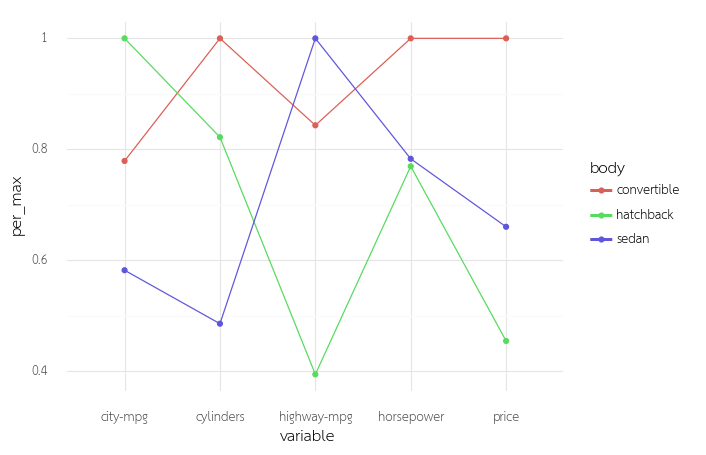

<ggplot: (8731373575109)>

In [77]:
g = (ggplot(df_m,aes(x='variable',y='per_max',group='body',color='body')) +
     geom_point() + geom_line() 
    )
g

## Parallel coordinates

An alternative to radar charts - again, the arrngement of the variables is important. Usually benefits from highlighting values

In [80]:
df = pd.read_csv('data/parallel-coordinates.csv')
df_m = df.iloc[:,1:].melt('State')
df_m.head()

,State,variable,value
0,Alabama,Burlgary Rate,80
1,Alaska,Burlgary Rate,78
2,Arizona,Burlgary Rate,71
3,Arkansas,Burlgary Rate,63
4,California,Burlgary Rate,53


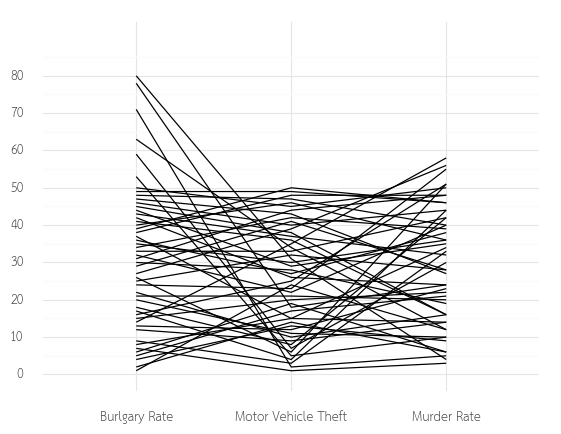

<ggplot: (-9223363305481345504)>

In [88]:
g = (ggplot(df_m,aes(x='variable',y='value',group='State'))+
    geom_line() + xlab('') + ylab('') +
    scale_y_continuous(breaks=range(0,90,10),limits=(0,90)))
g

## Bullet

Good for showing a measurement against the context of a target or performance range

In [110]:
df = pd.read_csv('data/bullet.csv')
df['average'] = df['average'] - df['poor']
df['good'] = df['good'] - df['average'] - df['poor']
df_m = df[['Category','poor','average','good']].melt('Category')
df_m['variable'] = pd.Categorical(df_m['variable'],categories=['good','average','poor'], 
                                  ordered=True)
df_m.head()

,Category,variable,value
0,Technology,poor,300000
1,Furniture,poor,500000
2,Office Supplies,poor,350000
3,Technology,average,200000
4,Furniture,average,150000


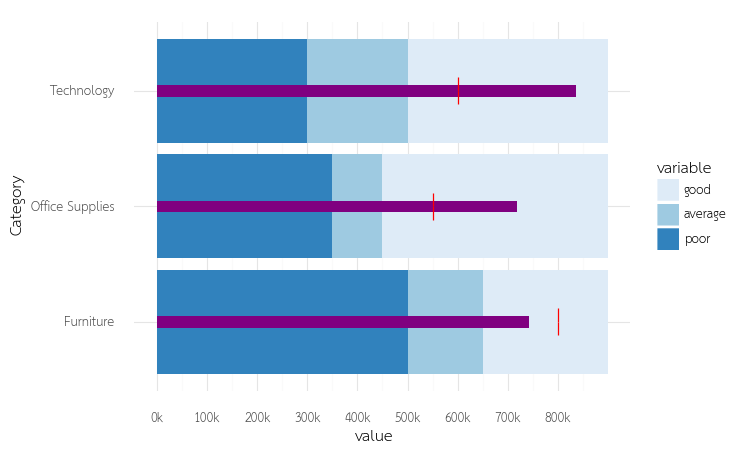

<ggplot: (8731373964138)>

In [176]:
g = (ggplot() +
     #add criteria
     geom_col(df_m,aes(x='Category',y='value',fill='variable')) + coord_flip() +
     #add sales
     geom_col(df,aes(x='Category',y='Sales'),width=0.1,fill='purple') +
     #add targets
     geom_point(df,aes(x='Category',y='Target'),size=5,color='red',shape=2) +
     geom_point(df,aes(x='Category',y='Target'),size=5,color='red',shape=3) +
     scale_fill_brewer() +
     scale_y_continuous(breaks=range(0,900000,100000),labels=utils.k_format())
    )
g

## Grouped symbol

An alternative to bar/column charts when being able to count data or highlight individual elements is useful.